In [13]:
import pandas as pd
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder

In [11]:
data = pd.DataFrame({
    'hair_color': ['blonde', 'brunette', 'red', 'black', 'brunette', 'black', 'red', 'black'],
    'eye_color': ['amber', 'gray', 'green', 'hazel', 'amber', 'gray', 'green', 'hazel'],
    'skin_color': ['fair', 'brown', 'brown', 'brown', 'fair', 'brown', 'fair', 'fair']
})

In [20]:
encoder = LabelEncoder()
data_encoded = data.apply(encoder.fit_transform)

In [24]:
kmode = KModes()

In [25]:
kmode.fit(data_encoded)

KModes(n_init=1)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [51]:
def perform_mode(n, data, n_init = 10, max_iter = 100):
    kmode = KModes(n_clusters=n, init='Huang', n_init=n_init, verbose=0, max_iter=max_iter)
    clusters = kmode.fit_predict(data)
    return kmode, clusters

In [60]:
costs = [];
for i in range(1, 5):
    kmode, _ = perform_mode(i, data_encoded, 10)
    costs.append(kmode.cost_)

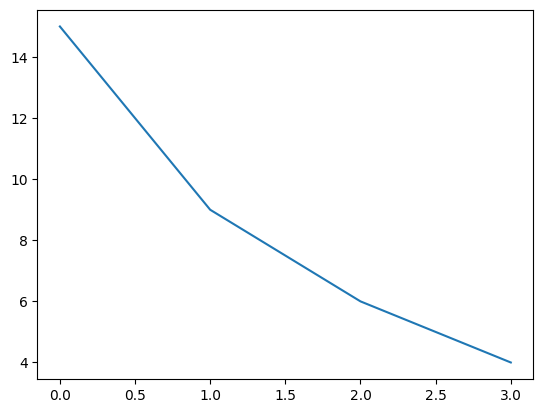

In [61]:
import matplotlib.pyplot as plt
plt.plot(costs)

In [ ]:
def analyze_epochs(data, n_clusters, max_epochs):
    kmode = KModes(n_clusters=n_clusters, init='Huang', n_init=1, verbose=1)
    for epoch in range(1, max_epochs + 1):
        print(f"\nEpoch {epoch}:")
        kmode.max_iter = epoch
        clusters = kmode.fit_predict(data)
        print(f"Cost: {kmode.cost_}")